# HANDWRITTEN DIGIT CLASSIFICATION

In [1]:
#Importing essential Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

In [2]:
data_test=pd.read_csv("mnist_test.csv")
data_train=pd.read_csv("mnist_train.csv")

In [3]:
data_test.head(5)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
y_test=np.array(data_test.iloc[:,0:1]) #integer location
x_test=np.array(data_test.iloc[:,1:])
y_train=np.array(data_train.iloc[:,0:1])
x_train=np.array(data_train.iloc[:,1:])

In [5]:
x_train.shape

(60000, 784)

In [6]:
y_test

array([[7],
       [2],
       [1],
       ...,
       [4],
       [5],
       [6]], dtype=int64)

In [7]:
x_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [8]:
y_ts=[]
for i in range(len(y_test)):
    y_ts.append(y_test[i][0])
y_trn=[]
for i in range(len(y_train)):
    y_trn.append(y_train[i][0])

In [9]:
y_ts=np.array(y_ts)
y_trn=np.array(y_trn)

In [10]:
x_ts=[]
for i in x_test:
    x_ts.append(i.reshape(28,28,1))

In [11]:
x_tr=[]
for i in x_train:
    x_tr.append(i.reshape(28,28,1))

In [12]:
x_ts=np.array(x_ts)
x_tr=np.array(x_tr)

In [13]:
x_ts=x_ts.astype(np.float32)
x_tr=x_tr.astype(np.float32)

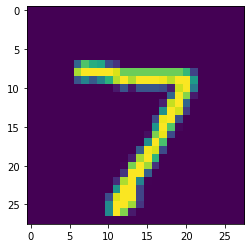

In [20]:
plt.imshow(x_ts[0])

In [21]:
#import model

In [22]:
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Conv2D,Conv1D,Dense,Flatten

In [23]:
model=Sequential()
model.add(Conv2D(filters=8,kernel_size=(3,3),input_shape=(28,28,1),padding="same", activation="relu"))
model.add(Conv2D(filters=10,kernel_size=(28,28), activation="relu"))
model.add(Flatten())
model.add(Dense(10,activation="softmax"))

In [24]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [25]:
model.fit(x=x_tr,y=y_trn,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 21s 11ms/step - loss: 2.0711 - accuracy: 0.2052
Epoch 2/10
1875/1875 [==============================] - 20s 11ms/step - loss: 1.9923 - accuracy: 0.2119
Epoch 3/10
1875/1875 [==============================] - 20s 11ms/step - loss: 1.4972 - accuracy: 0.4479
Epoch 4/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2840 - accuracy: 0.9418
Epoch 5/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1498 - accuracy: 0.9632
Epoch 6/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1044 - accuracy: 0.9715
Epoch 7/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0832 - accuracy: 0.9758
Epoch 8/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0694 - accuracy: 0.9792
Epoch 9/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0604 - accuracy: 0.9818
Epoch 10/10
1875/1875 [==============================] - 20s 11m

In [32]:
prd=model.predict(np.array([x_ts[78]]))

1/1 [==============================] - 0s 49ms/step


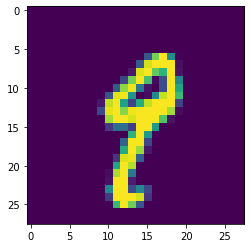

In [33]:
plt.imshow(x_ts[78])

In [34]:
prd

array([[5.50918276e-16, 1.21543526e-04, 7.00162502e-07, 2.62524509e-06,
        9.84293401e-01, 5.31187148e-08, 1.22020059e-17, 3.34240287e-03,
        3.24645080e-04, 1.19145969e-02]], dtype=float32)